In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
%matplotlib inline
import datashader as ds
import colorcet

# Logistic Map

The logistic map is written,

$x_{n+1}$ = $x_n R(1-x_n)$,

where $x_n\in[0,1]$ represents the ratio of existing population to the maximum possible population, and $R\in[0,4]$.

More: https://en.wikipedia.org/wiki/Logistic_map

In [2]:
def logistic(x0,r,iterations):
    x1_list = []    
    for i in range(iterations):
        x1_list.append(x0)
        x1=x0*r*(1-x0)
        x0=x1
    return x1_list  

In [3]:
df = pd.DataFrame()
df2 = pd.DataFrame()

x0=0.001
iterations=1000
df['t']=list(range(iterations))
df2['t']=list(range(iterations))

for r in np.arange(1,4,0.0025):
    df[str(r)]=logistic(x0,r,iterations)

for r in np.arange(3,4,0.001):
    df2[str(r)]=logistic(x0,r,iterations)

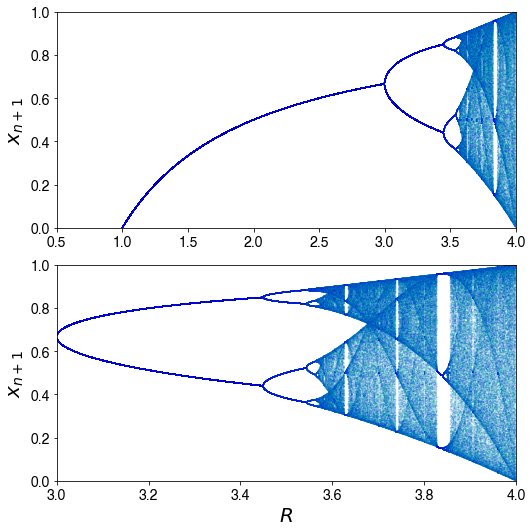

In [231]:
fig, ax = plt.subplots(2,1,figsize=(7.5,7.5))

sample=500

mydata = df.set_index('t').tail(sample)
for i in mydata.columns:    
    mydata['r'] = float(i)
    ax[0].scatter(mydata['r'], mydata[str(i)], c=mydata.index, cmap='winter_r', 
                  vmin=np.min(mydata.index), vmax=np.max(mydata.index), alpha=1, s=0.005, marker='o')

ax[0].set_ylim(0,1)
ax[0].set_xlim(0.5,4)
ax[0].tick_params(labelsize=14)
ax[0].set_ylabel('$x_{n+1}$', fontsize=20)
    
mydata = df2.set_index('t').tail(sample)
for i in mydata.columns:    
    mydata['r'] = float(i)
    ax[1].scatter(mydata['r'], mydata[str(i)], c=mydata.index, cmap='winter_r', 
                  vmin=np.min(mydata.index), vmax=np.max(mydata.index), alpha=1, s=0.005, marker='o')
    
ax[1].set_ylim(0,1)
ax[1].set_xlim(3,4)
ax[1].tick_params(labelsize=14)
ax[1].set_ylabel('$x_{n+1}$', fontsize=20)
ax[1].set_xlabel('$R$', fontsize=20)

fig.tight_layout()

In [232]:
fig.savefig('logistic_map.png', dpi=300, bbox_inches='tight')

## Datashader

In [73]:
df.drop('t', axis=1).tail(sample).reset_index().drop('index', axis=1)

,1.0,1.0025,1.005,1.0074999999999998,1.0099999999999998,1.0124999999999997,1.0149999999999997,1.0174999999999996,1.0199999999999996,1.0224999999999995,...,3.9749999999999366,3.9774999999999365,3.9799999999999365,3.9824999999999364,3.9849999999999364,3.9874999999999363,3.9899999999999363,3.992499999999936,3.994999999999936,3.997499999999936
0,0.000666,0.001746,0.003751,0.006465,0.009342,0.012083,0.014668,0.017156,0.019592,0.021999,...,0.253678,0.639616,0.022506,0.701911,0.065030,0.019218,0.042060,0.891560,0.324240,0.947588
1,0.000666,0.001748,0.003755,0.006471,0.009347,0.012086,0.014670,0.017157,0.019592,0.021999,...,0.752568,0.916843,0.087556,0.833267,0.242292,0.075159,0.160762,0.385997,0.875338,0.198534
2,0.000666,0.001749,0.003760,0.006477,0.009353,0.012090,0.014672,0.017158,0.019593,0.021999,...,0.740183,0.303253,0.317964,0.553302,0.731592,0.277170,0.538320,0.946235,0.435939,0.636076
3,0.000665,0.001750,0.003765,0.006484,0.009358,0.012093,0.014673,0.017158,0.019593,0.022000,...,0.764441,0.840409,0.863114,0.984310,0.782514,0.798883,0.991641,0.203114,0.982355,0.925354
4,0.000665,0.001752,0.003769,0.006490,0.009363,0.012096,0.014675,0.017159,0.019593,0.022000,...,0.715782,0.533469,0.470231,0.061504,0.678190,0.640668,0.033074,0.646222,0.069246,0.276122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.000501,0.002219,0.004843,0.007417,0.009897,0.012345,0.014778,0.017199,0.019608,0.022005,...,0.176477,0.737595,0.991852,0.987175,0.213042,0.931061,0.073258,0.445757,0.569466,0.316627
496,0.000501,0.002219,0.004843,0.007417,0.009897,0.012345,0.014778,0.017199,0.019608,0.022005,...,0.577699,0.769839,0.032166,0.050420,0.668106,0.255942,0.270887,0.986378,0.979472,0.864957
497,0.000501,0.002220,0.004844,0.007417,0.009897,0.012345,0.014778,0.017199,0.019608,0.022005,...,0.969752,0.704761,0.123903,0.190672,0.883636,0.759362,0.788054,0.053646,0.080326,0.466935
498,0.000500,0.002220,0.004845,0.007418,0.009897,0.012345,0.014778,0.017199,0.019608,0.022005,...,0.116598,0.827611,0.432033,0.614565,0.409752,0.728642,0.666430,0.202690,0.295126,0.995005


In [94]:
dx = pd.DataFrame()
temp = pd.DataFrame()

sample=750
data = df2.drop('t', axis=1).tail(sample).reset_index().drop('index', axis=1)

temp['r'] = list(range(len(data)))
for i in data.columns:

    temp['r'] = float(i)
    temp['x'] = data[i]
    dx = pd.concat([dx,temp])
    
dx = dx.reset_index().drop('index', axis=1)
dx

,r,x
0,3.000,0.651549
1,3.000,0.681099
2,3.000,0.651609
3,3.000,0.681044
4,3.000,0.651670
...,...,...
749995,3.999,0.226588
749996,3.999,0.700809
749997,3.999,0.838494
749998,3.999,0.541553


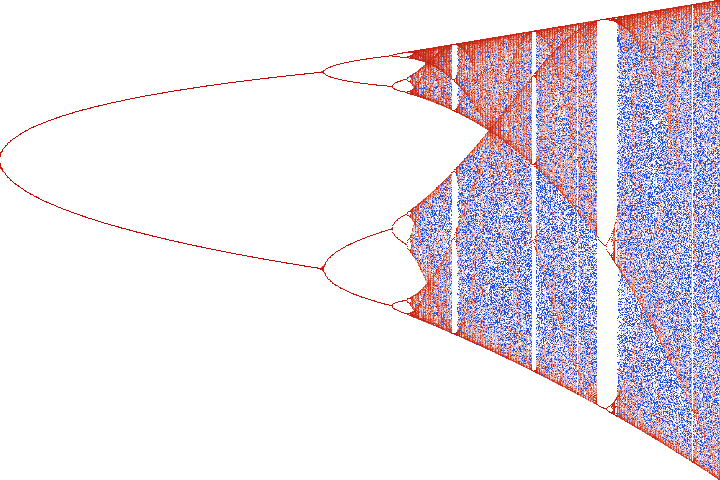

In [99]:
cvs = ds.Canvas(plot_width=720, plot_height=480)
agg = cvs.points(dx, 'r', 'x')
img = ds.tf.shade(agg, cmap=colorcet.coolwarm)
ds.utils.export_image(img=img, filename='shade', fmt=".png")